In [55]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from rebound.plotting import OrbitPlotOneSlice
from collections import OrderedDict

# Take the random draw from their posterior from their Fig 27 on GLR angles (data/julia/plot_elements.jl)

In [47]:
masses = [1., 4.5651630946375855e-5, 4.509775588066495e-5, 1.2793574298379903e-5, 2.2636788066718058e-5, 3.4259988884100445e-5, 4.390338504975531e-5, 9.898177265368541e-6]                                                                                          
yr = 365.242
G = 39.4845/yr**2

with open('../data/T1_positions_velocities0001.txt', 'r') as f:
    lines = f.readlines()
    vals = np.array(lines[0].split())
    vals1 = np.array(lines[1].split())
    xs = vals[1:25].reshape((8,3))
    vs = vals[25:].reshape((8,3))
    xs1 = vals1[1:25].reshape((8,3))
    vs1 = vals1[25:].reshape((8,3))
    
    sim = rebound.Simulation()
    sim.t = float(vals[0])
    sim.G = G
    for m, x, v in zip(masses, xs, vs):
        sim.add(m=m, x=float(x[0]), y=float(x[1]), z=float(x[2]), vx=float(v[0]), vy=float(v[1]), vz=float(v[2]))

(-0.15, 0.15)

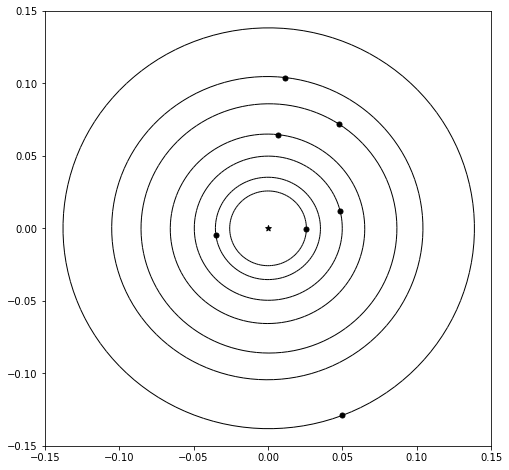

In [48]:
fig, ax = plt.subplots(figsize=(8,8))     
OrbitPlotOneSlice(sim, ax, axes='xz')
ax.set_xlim([-0.15,0.15])
ax.set_ylim([-0.15,0.15])

# Check that we get the same pos/vel at next output in the text file when we integrate to that time

Checks out

In [49]:
sim.integrate(float(vals1[0]))

In [50]:
sim.status()

---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Jun  2 2020 16:05:36
Number of particles: 	8
Selected integrator: 	ias15
Simulation time:     	7.2579911552500007e+03
Current timestep:    	0.014580
---------------------------------
<rebound.Particle object, m=1.0 x=-3.2619888442726714e-06 y=0.0 z=-6.94915831738841e-06 vx=-4.016681626044886e-06 vy=0.0 vz=3.496430748486782e-06>
<rebound.Particle object, m=4.5651630946375855e-05 x=0.024912833807570936 y=0.0 z=-0.0065903881376292595 vx=-0.02752758552882905 vy=0.0 vz=-0.10357015480104247>
<rebound.Particle object, m=4.509775588066495e-05 x=-0.035349196291089714 y=0.0 z=0.0009039233039792177 vx=0.0024289003436635467 vy=0.0 vz=0.0913843947118092>
<rebound.Particle object, m=1.2793574298379903e-05 x=0.04936468736165984 y=0.0 z=0.007367832252816073 vx=0.011210242828105576 vy=0.0 vz=-0.07603345998170646>
<rebound.Particle object, m=2.2636788066718058e-05 x=0.010963450774249069 y=0.0 z=0.06405622983875721 vx=0.

In [51]:
xs1

array([['-3.2619888441728642e-6', '0.0', '-6.94915831754424e-6'],
       ['0.024912833808350028', '0.0', '-0.006590388135198331'],
       ['-0.03534919629136905', '0.0', '0.0009039233063590534'],
       ['0.04936468735174932', '0.0', '0.0073678322475352696'],
       ['0.010963450774227267', '0.0', '0.06405622983919429'],
       ['0.05034041934382413', '0.0', '0.0701210699592658'],
       ['0.014737590104499565', '0.0', '0.10363296164379775'],
       ['0.047223479081982454', '0.0', '-0.13004593657486133']],
      dtype='<U22')

In [53]:
tmax = 100*yr
sim.automateSimulationArchive("trappist.bin", interval=tmax/1000)
sim.integrate(sim.t+tmax)

In [54]:
sa = rebound.SimulationArchive("trappist.bin")
len(sa)

1001

In [56]:
def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val*180/np.pi

def glr(sa, tbr):
    for i, sim in enumerate(sa):
        ps = sim.particles
        phi = {}
        for resonance in threebodyresonances.items():
            triad = resonance[0]
            p1 = triad[0]
            p2 = triad[1]
            p3 = triad[2]
            res = resonance[1]
            p = res[0]
            q = res[1]
            name = 'phi_'+p1+p2+p3
            phi[name] = wrap(p*ps[p1].l - (p+q)*ps[p2].l + q*ps[p3].l)
        return pd.Series(phi)

In [62]:
a = OrderedDict([('bcd', 3), ('cde', 4)])

In [66]:
for b in a.items():
    print(b[0])

bcd
cde


In [85]:
sa = rebound.SimulationArchive("trappist.bin")
Nout = len(sa)
planets = OrderedDict([('bcd', (1,2,3)), ('cde', (2,3,4)), ('def', (3,4,5)), ('efg', (4,5,6)), ('fgh', (5,6,7))])
phi = OrderedDict([('bcd', np.zeros(Nout)), ('cde', np.zeros(Nout)), ('def', np.zeros(Nout)), ('efg', np.zeros(Nout)), ('fgh', np.zeros(Nout))])
pq = OrderedDict([('bcd', (2,3)), ('cde', (1,2)), ('def', (2,3)), ('efg', (1,2)), ('fgh', (1,1))])
t = np.zeros(Nout
            )
for i, sim in enumerate(sa):
    ps = sim.particles
    t[i] = sim.t
    for trio in planets.keys():
        p1, p2, p3 = planets[trio]
        p, q = pq[trio]
        phi[trio][i] = wrap(p*ps[p1].l - (p+q)*ps[p2].l + q*ps[p3].l)
        
phi['bcd'] = 360-phi['bcd']
phi['cde'] = 360-phi['cde']
phi['def'] = 360-phi['def']
phi['efg'] = 360-phi['efg']
phi['fgh'] = 360-phi['fgh']

# Match Fig 27

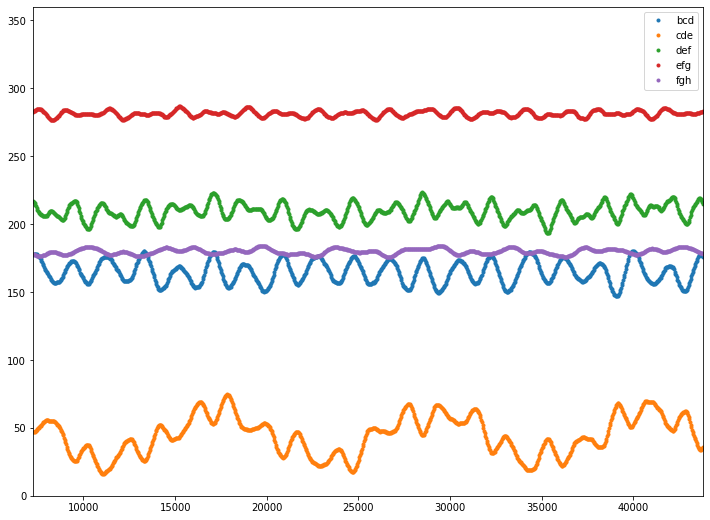

In [88]:
fig, ax = plt.subplots(figsize=(12, 9))
for trio in planets.keys():
    ax.plot(t, phi[trio],  '.', label=trio)
    
ax
ax.set_ylim([0,360])
ax.set_xlim([t[0], t[-1]])
ax.legend()

# Match Fig 22 for the free eccentricities (note b c over 12 d, others over 485, see caption)